In [36]:
! pip install -q kaggle


In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tayyibismail","key":"0d268b7790fa8080d3c57f3a301ca102"}'}

In [13]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
!cp kaggle.json ~/.kaggle/


In [15]:
! chmod 600 ~/.kaggle/kaggle.json


In [16]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 148M/163M [00:00<00:00, 241MB/s]
100% 163M/163M [00:00<00:00, 205MB/s]


In [17]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [19]:
with_mask_files = os.listdir('/content/data/with_mask')

In [20]:
without_mask_files = os.listdir('/content/data/without_mask')

In [21]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [22]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
labels = with_mask_labels + without_mask_labels

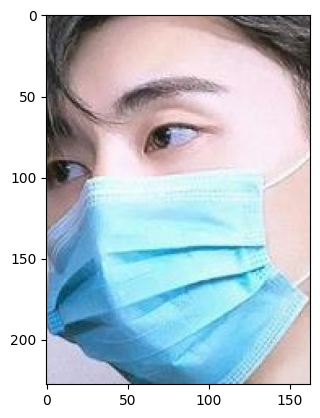

In [56]:

img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

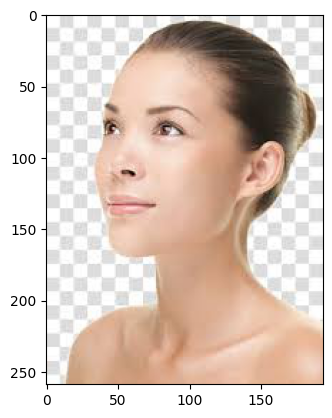

In [57]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [25]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


X = np.array(data)
Y = np.array(labels)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
import tensorflow as tf
from tensorflow import keras

In [44]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 6s 20ms/step - loss: 0.4633 - acc: 0.7942 - val_loss: 0.2937 - val_acc: 0.8777
Epoch 2/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2698 - acc: 0.8948 - val_loss: 0.2220 - val_acc: 0.9041
Epoch 3/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2273 - acc: 0.9108 - val_loss: 0.2026 - val_acc: 0.9124
Epoch 4/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1897 - acc: 0.9235 - val_loss: 0.2089 - val_acc: 0.9190
Epoch 5/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1601 - acc: 0.9384 - val_loss: 0.2085 - val_acc: 0.9207
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1341 - acc: 0.9492 - val_loss: 0.1966 - val_acc: 0.9223
Epoch 7/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1229 - acc: 0.9571 - val_loss: 0.2857 - val_acc: 0.9157
Epoch 8/10
170/170 [==============================] - 3s 17ms/step - 

In [45]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2613 - acc: 0.9332
Test Accuracy = 0.9331568479537964


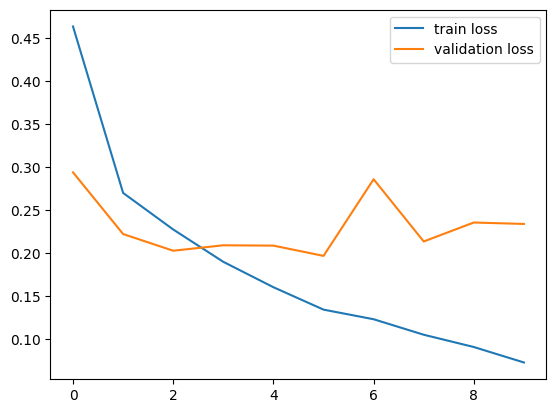

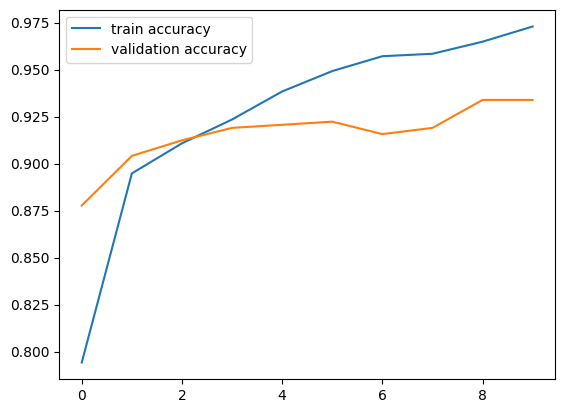

In [46]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

48/48 [==============================] - 0s 9ms/step


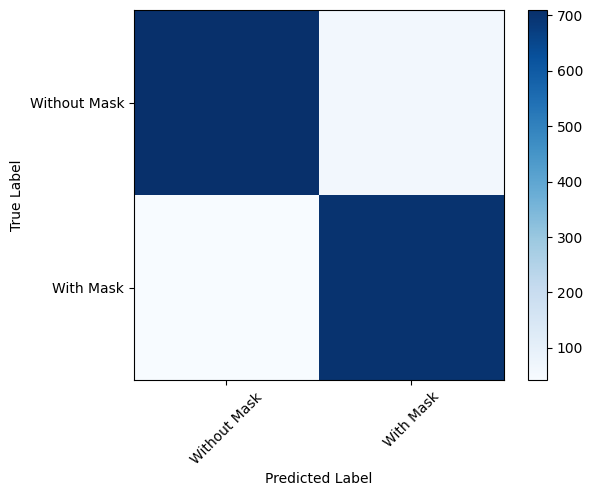

In [51]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test data
Y_pred = model.predict(X_test_scaled)
Y_pred_labels = np.argmax(Y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_labels)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(num_of_classes)
plt.xticks(tick_marks, ['Without Mask', 'With Mask'], rotation=45)
plt.yticks(tick_marks, ['Without Mask', 'With Mask'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


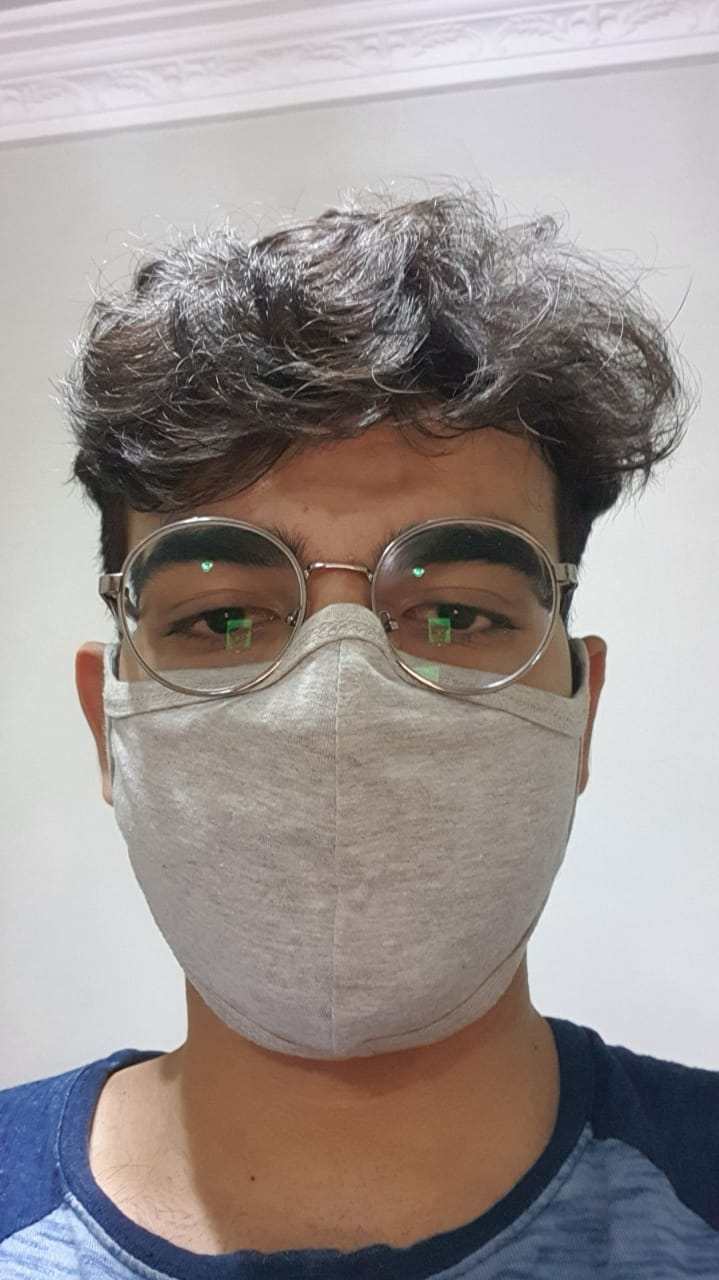

1/1 [==============================] - 0s 25ms/step
[[0.25491446 0.99677354]]
1
The person in the image is wearing a mask


In [59]:
input_image_path = '/content/WhatsApp Image 2023-05-15 at 04.33.42.jpg'

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')